# Digit Recognizer

Target: Take an image of a handwritten single digit, and determine what that digit is.

Source: https://www.kaggle.com/c/digit-recognizer

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# high-level neural networks API - running on top of TensorFlow
import keras
from keras.datasets import mnist 
# Sequential is a linear stack of layers
from keras.models import Sequential
# Dense - type of layers, Dropout - tool, which decrease chance of overfitting
from keras.layers import Dense, Dropout

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import time
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
# load dataset
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [3]:
y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

In [4]:
# shape of data
X_train.shape

(42000, 784)

In [5]:
def vis_rand_dig():
    # size of pixcel
    plt.figure(figsize = (10, 10))
    # print random digit
    rand_indexes = np.random.randint(0, X_train.shape[0], 16)
    for index,im_index in enumerate(rand_indexes):
        plt.subplot(4, 4, index+1)
        plt.imshow(X_train.values[im_index].reshape(28,28), cmap = 'tab20c', interpolation = 'none')
        plt.title('Class %d' % y_train[im_index])
    plt.tight_layout()

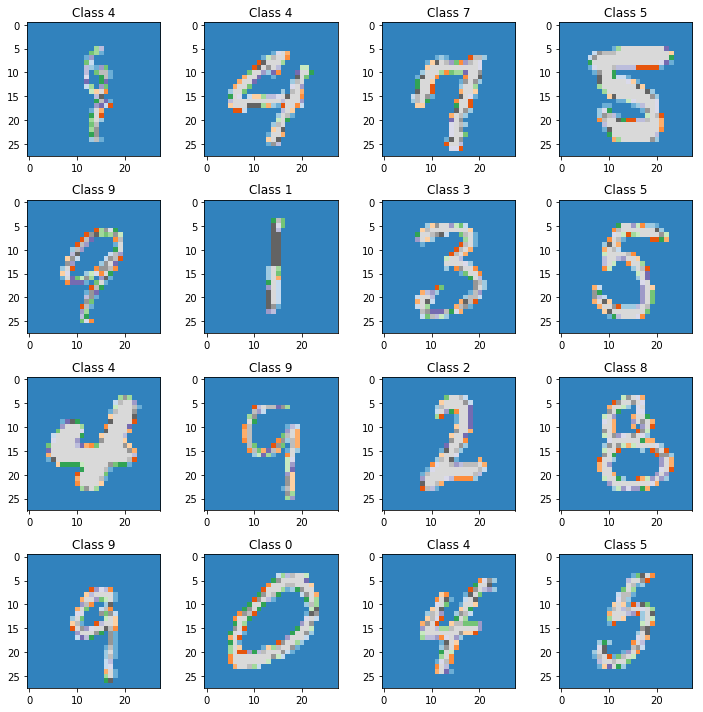

In [6]:
vis_rand_dig()

# Prepare data

To prepare data we have to tree steps:
    - transmission data to neurons (we have 28x28 image, so we have 784 neurons);
    - normalization data (normalize value of pixels from 0 to 1);
    - transmission vector to matrix (every neutron cointains probability of a digit);

In [7]:
def prep_data(X_train, y_train):
   
    pixels = X_train.shape[1]
    y_train = keras.utils.np_utils.to_categorical(y_train)
    classes = y_train.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = int(time.time()))
    
    return X_train, y_train, X_test, y_test, pixels, classes

In [8]:
X_train, y_train, X_test, y_test, in_neurons, out_neurons = prep_data(X_train, y_train)

# MLP

At first MLP will have three layer: input, hidden and output.
    - input must have 784 (28x28 size of picture);
    - the nuber of neurons in hidden layer is dependent on input layer. It is often the case that this layer is smaller than input layer. I will choose 512 neurons;
    - output have 10 (unique) class;

I use Keras to do this.

In [9]:
mlp = Sequential([
    # first hodden layer + size of input layer
    Dense(512, input_dim = in_neurons, activation = 'relu'),
    # dropout - figth with overfitting
    Dropout(0.6),
    # second hidden layer
    Dense(256, activation = 'relu'),
    Dropout(0.3),
    # output layer
    Dense(out_neurons, activation = 'softmax')])

mlp.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


I have four layers (first is input, which initiated in first hidden layer - Keras allows it).
We see three layers: hidden and output. Type of layers are Dense. First of hidden layer has 512 output neurons. Second hidden layer has 256 neurons. Output layer has 10 output neutrons. Also we have dropout.
In below table we see three value: Total params (all of weight), Trainable params, which has the same result as Total params and Non-trainable params (this value will be more in Transfer Learning).

# Training

In [10]:
mlp.fit(X_train, y_train, batch_size = 128, epochs = 25, verbose = 2, validation_data = (X_test, y_test));

Train on 37800 samples, validate on 4200 samples
Epoch 1/25
 - 38s - loss: 11.7067 - acc: 0.2693 - val_loss: 8.6635 - val_acc: 0.4557
Epoch 2/25
 - 33s - loss: 9.0462 - acc: 0.4327 - val_loss: 6.2967 - val_acc: 0.6017
Epoch 3/25
 - 34s - loss: 7.0230 - acc: 0.5580 - val_loss: 5.6621 - val_acc: 0.6448
Epoch 4/25
 - 32s - loss: 5.6921 - acc: 0.6403 - val_loss: 3.7399 - val_acc: 0.7648
Epoch 5/25
 - 32s - loss: 4.9458 - acc: 0.6881 - val_loss: 3.8216 - val_acc: 0.7590
Epoch 6/25
 - 32s - loss: 4.2574 - acc: 0.7308 - val_loss: 2.3069 - val_acc: 0.8524
Epoch 7/25
 - 33s - loss: 2.9528 - acc: 0.8116 - val_loss: 1.7416 - val_acc: 0.8893
Epoch 8/25
 - 34s - loss: 2.6218 - acc: 0.8328 - val_loss: 1.8352 - val_acc: 0.8817
Epoch 9/25
 - 33s - loss: 2.4772 - acc: 0.8423 - val_loss: 1.6741 - val_acc: 0.8931
Epoch 10/25
 - 31s - loss: 2.3402 - acc: 0.8509 - val_loss: 1.3463 - val_acc: 0.9126
Epoch 11/25
 - 34s - loss: 2.2672 - acc: 0.8553 - val_loss: 1.4031 - val_acc: 0.9105
Epoch 12/25
 - 32s - los

We have 25 epoch (in one epoch we have 60 iteration -> batch_size = 1000). Metrics of train set: loss and acc. Train metrics is val_loss and val_acc.

# Testing

In [11]:
result = mlp.evaluate(X_test, y_test)
print('Loss: ', result[0])
print('Acc: ', result[1])
print('Error: %.2f%%' %  (100 - result[1]*100))

4200/4200 [==============================] - 4s 1ms/step
Loss:  1.0939805203960073
Acc:  0.9307142857142857
Error: 6.93%


In [12]:
results = mlp.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("mnist_mlp.csv",index=False)